 Generating new data with CTGAN, whole distribution

In [3]:
 # pip install ctgan pandas

import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from ctgan import CTGAN

pd.set_option('display.float_format', '{:.1f}'.format)
df = pd.read_csv("Numeric data (last year work).csv")
df

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
0,6.5,90000.0,67.0,2023,138,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7.4,24000.0,66.0,2023,116,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,7.0,21000.0,85.0,2023,117,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,7.1,56000.0,54.0,2023,157,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6.6,66000.0,64.0,2023,158,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,6.3,22000.0,67.0,2021,141,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1127,7.1,172000.0,59.0,2008,112,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1128,7.6,198000.0,79.0,1986,96,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1129,6.5,71000.0,46.0,1992,104,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [4]:
target = "Rating"

# typical X/y split, choose target variable as needed
X = df.drop([target], axis=1)
y = df[target]

# initialize CTGAN and start training
# CTGAN is based on neural networks (GAN), that's why we have to specify epochs
ctgan = CTGAN()
ctgan.fit(df, epochs=100)

# get the data from the model
num_new_data = 10000
synthetic_df = ctgan.sample(num_new_data)

In [5]:
# combine with original data
df = pd.concat([df, synthetic_df])

In [ ]:
df

# now I have in 10 times more data
# but the distribution is the same

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
0,6.5,90000.0,67.0,2023,138,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7.4,24000.0,66.0,2023,116,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,7.0,21000.0,85.0,2023,117,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,7.1,56000.0,54.0,2023,157,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6.6,66000.0,64.0,2023,158,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6.4,567024.8,57.9,2012,102,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,7.4,34109.5,72.9,2022,88,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9997,6.0,376259.7,72.8,2020,106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,7.4,394320.4,78.1,2019,93,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


<Axes: xlabel='Rating', ylabel='Count'>

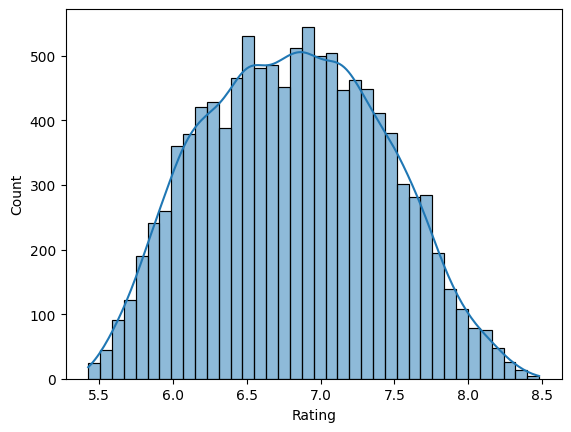

In [7]:
 # the distribution is identical, we just have more of the data
# one idea: generate more data => then use undersampling to alter the distribution
sns.histplot(data=df, x="Rating", kde=True)